In [9]:
from pandas_datareader.data import DataReader
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
# check out global - https://www.programiz.com/python-programming/methods/built-in/globals#:~:text=The%20globals()%20method%20returns,two%20kinds%20of%20symbol%20table.

In [11]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-06-16,3426.350098,3360.530029,3392.000000,3415.250000,4202800.0,3415.250000,AMAZON
2021-06-17,3497.199951,3401.000000,3403.179932,3489.239990,5136500.0,3489.239990,AMAZON
2021-06-18,3507.000000,3473.709961,3479.989990,3486.899902,5204900.0,3486.899902,AMAZON
2021-06-21,3482.000000,3434.000000,3476.419922,3453.959961,3277100.0,3453.959961,AMAZON
2021-06-22,3523.780029,3456.090088,3458.060059,3505.439941,3345100.0,3505.439941,AMAZON
2021-06-23,3521.000000,3483.199951,3505.000000,3503.820068,2813300.0,3503.820068,AMAZON
2021-06-24,3524.860107,3430.850098,3507.639893,3449.080078,3832000.0,3449.080078,AMAZON
2021-06-25,3464.820068,3394.179932,3464.000000,3401.459961,3937500.0,3401.459961,AMAZON
2021-06-28,3448.000000,3413.510010,3416.000000,3443.889893,2238900.0,3443.889893,AMAZON


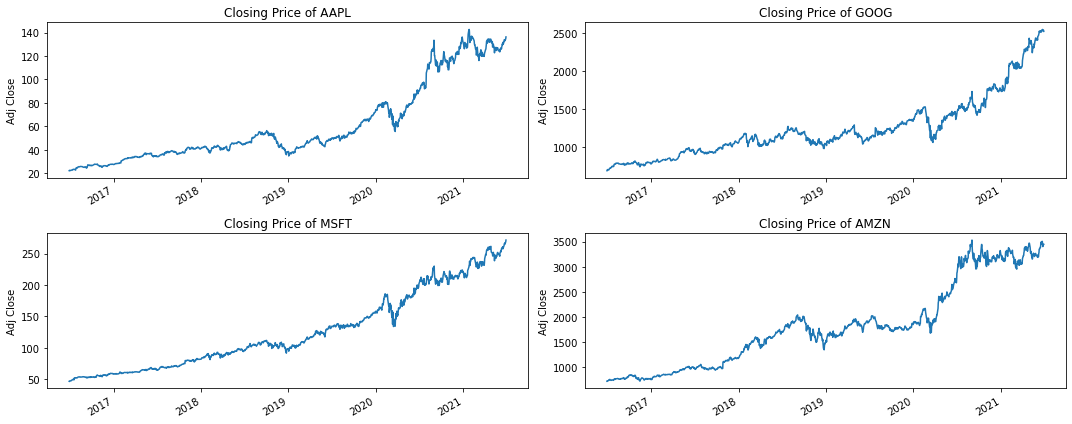

In [12]:
plt.figure(figsize = (15, 6))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

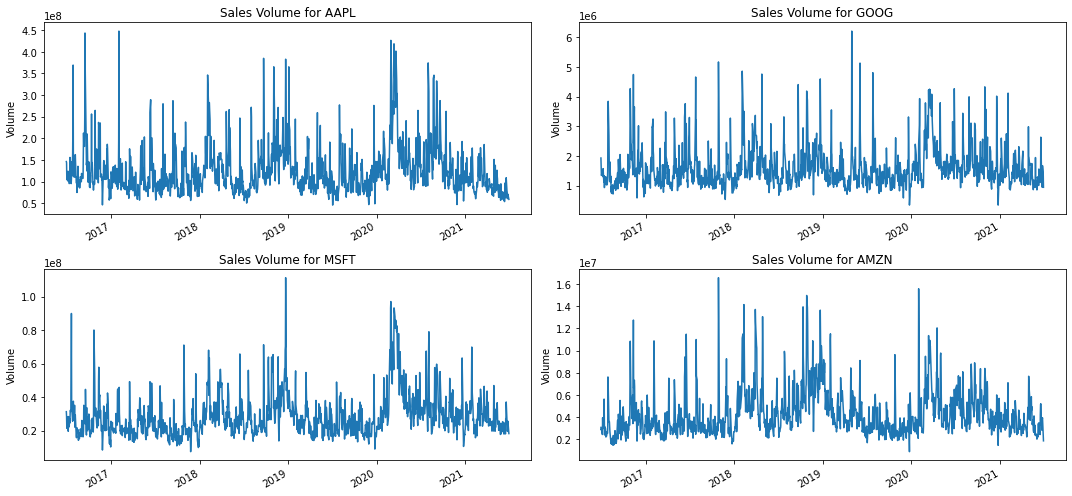

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Moving averages of stocks

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

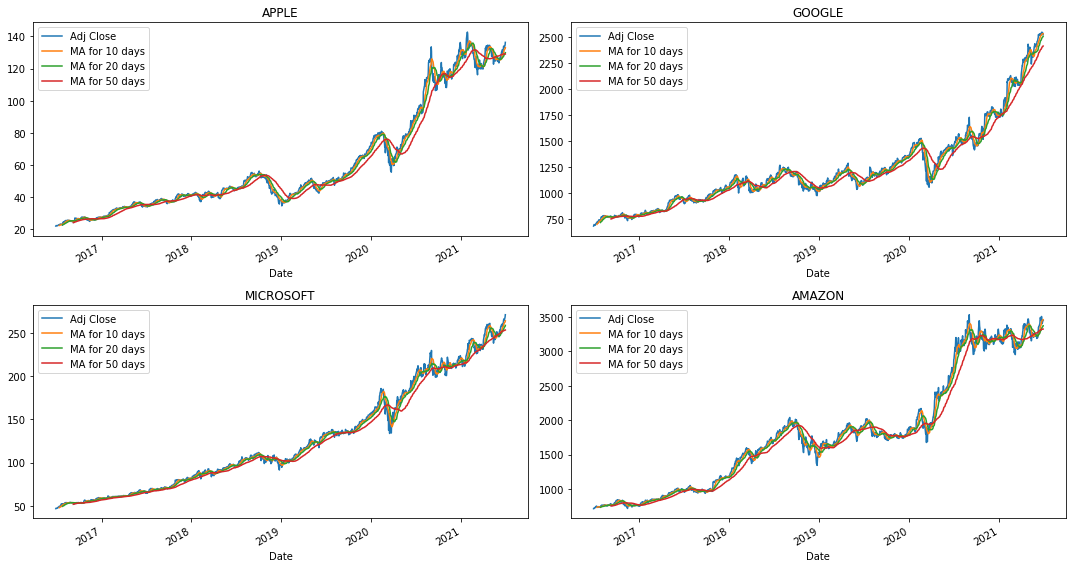

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Daily return of stocks

In [17]:
#pxt change is percentage change on daily basis
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

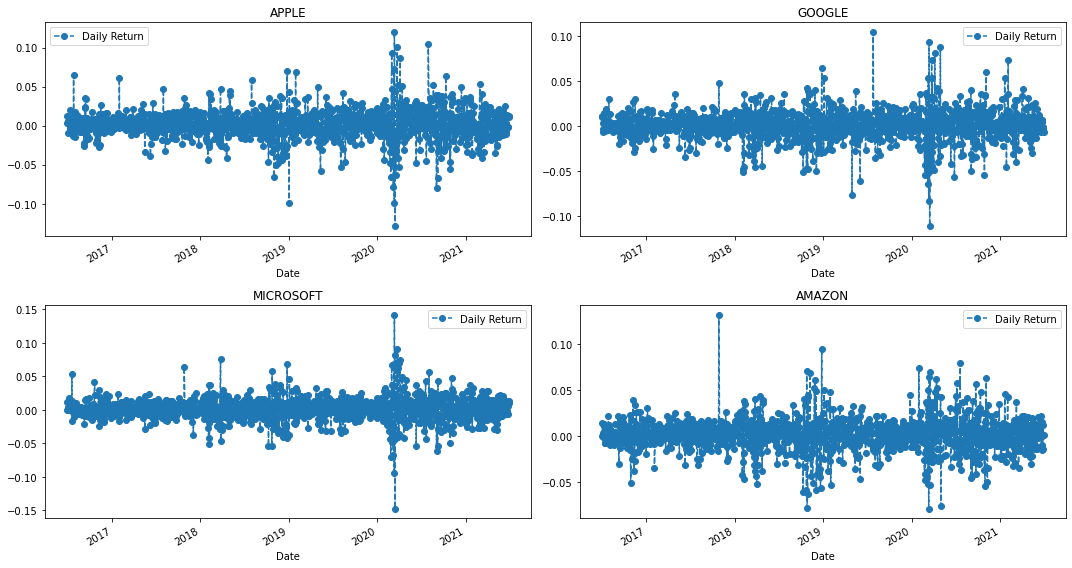

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

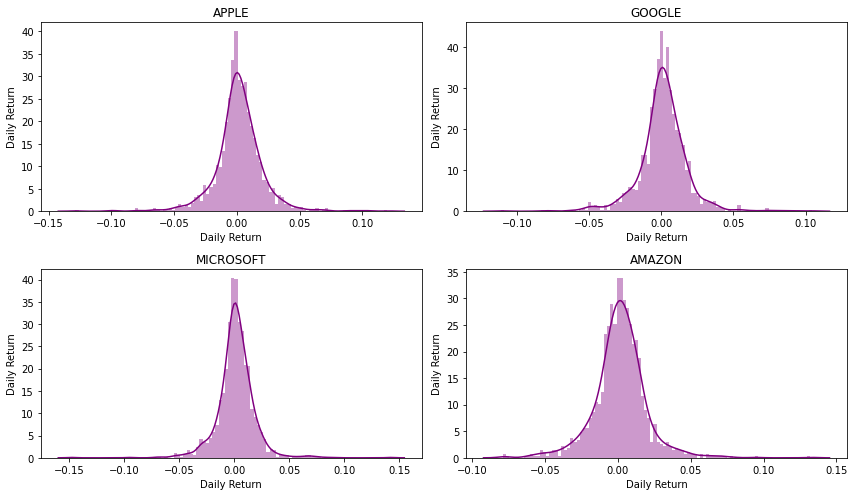

In [19]:
#dropna should be used 
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# correlation between closing prices of stocks

In [20]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-06-29,22.046766,684.109985,46.560383,715.599976
2016-06-30,22.327021,692.099976,47.140781,715.619995
2016-07-01,22.394749,699.210022,47.131561,725.679993
2016-07-05,22.184555,694.950012,47.140781,728.099976
2016-07-06,22.310671,697.770020,47.334240,737.609985
...,...,...,...,...
2021-06-23,133.699997,2529.229980,265.269989,3503.820068
2021-06-24,133.410004,2545.639893,266.690002,3449.080078
2021-06-25,133.110001,2539.899902,265.019989,3401.459961


In [21]:
# Make a new tech returns DataFrame(daily returns)
tech_rets = closing_df.pct_change()
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-06-29,NaN,NaN,NaN,NaN
2016-06-30,0.012712,0.011679,0.012466,0.000028
2016-07-01,0.003033,0.010273,-0.000196,0.014058
2016-07-05,-0.009386,-0.006093,0.000196,0.003335
2016-07-06,0.005685,0.004058,0.004104,0.013061
...,...,...,...,...
2021-06-23,-0.002090,-0.004236,-0.000904,-0.000462
2021-06-24,-0.002169,0.006488,0.005353,-0.015623
2021-06-25,-0.002249,-0.002255,-0.006262,-0.013807


c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


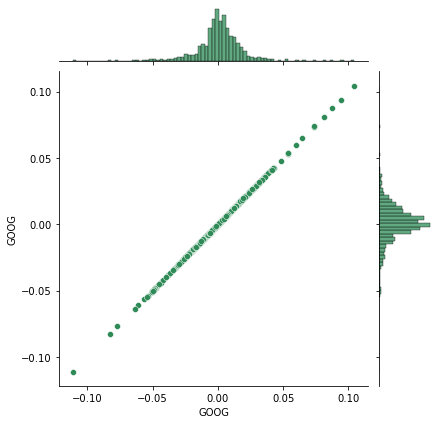

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


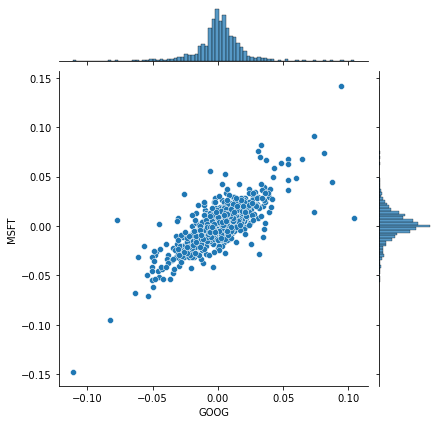

In [23]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

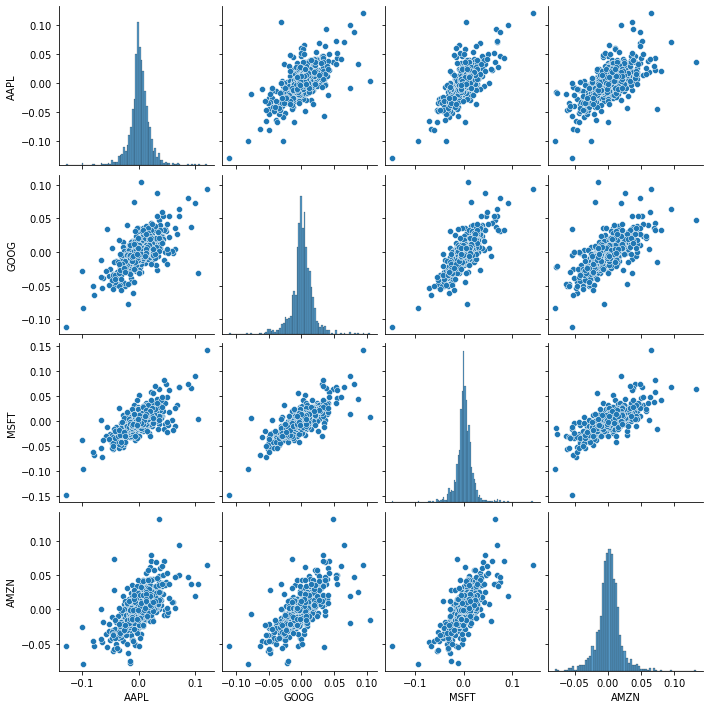

In [24]:
sns.pairplot(tech_rets)

some cool stuff in pairplots

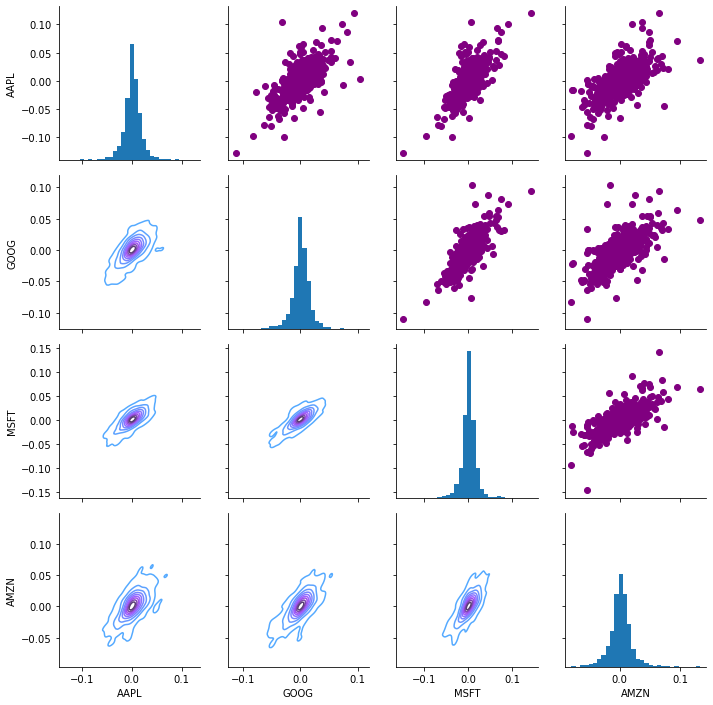

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())
# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')
# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

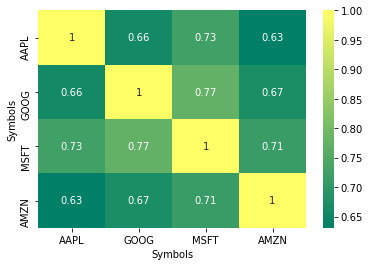

In [26]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

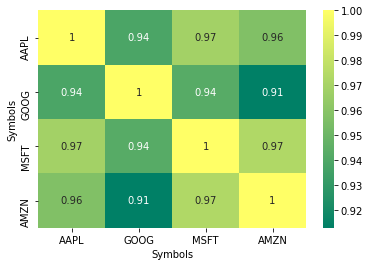

In [27]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# Prediction

In [28]:
#Only for AAPL stocks
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-06-23,134.320007,133.229996,133.770004,133.699997,60214200.0,133.699997
2021-06-24,134.639999,132.929993,134.449997,133.410004,68711000.0,133.410004
2021-06-25,133.889999,132.809998,133.460007,133.110001,70730700.0,133.110001


In [31]:
df.to_csv('AAPL.csv')

In [33]:
df = pd.read_csv('AAPL.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...,...
2383,2021-06-23,134.320007,133.229996,133.770004,133.699997,60214200.0,133.699997
2384,2021-06-24,134.639999,132.929993,134.449997,133.410004,68711000.0,133.410004
2385,2021-06-25,133.889999,132.809998,133.460007,133.110001,70730700.0,133.110001
2386,2021-06-28,135.250000,133.350006,133.410004,134.779999,62063700.0,134.779999


In [35]:
df1 = df.reset_index()['Close']

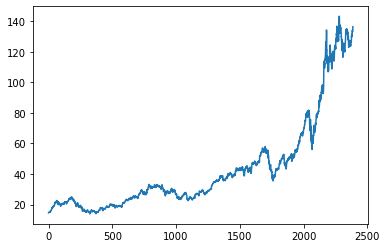

In [36]:
plt.plot(df1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))